<a href="https://colab.research.google.com/github/Yadanar025/Vietnamese-Sign-Language-Translation-additionalfiles/blob/main/Sign%20Language%20Translator/ActionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tải và import thư viện

In [ ]:
# Test if MediaPipe imports now
#python -c "import mediapipe as mp; print(f'MediaPipe {mp.__version__} loaded successfully!')"


In [ ]:
# !pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [ ]:
import mediapipe as mp
from keras.models import load_model
import os
from matplotlib import pyplot as plt
# ... rest of your code

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from keras.models import load_model

# 2. Nhận diện và vẽ keypoints bằng mediapipe holistic

In [ ]:
mp_hands = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_hands.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_hands.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [ ]:
cap = cv2.VideoCapture(0)
# # Set mediapipe model
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     while cap.isOpened():

#         # Read feed
         ret, frame = cap.read()

#         # Make detections
         image, results = mediapipe_detection(frame, holistic)
         print(results)

#         # Draw landmarks
         draw_styled_landmarks(image, results)

#         # Show to screen
         cv2.imshow('OpenCV Feed', image)

         # Break when type 'q'
         if cv2.waitKey(10) & 0xFF == ord('q'):
             break
     cap.release()
     cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
# len(results.left_hand_landmarks.landmark)

# 3. Lấy ra các giá trị keypoints

In [ ]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [ ]:
# result_test

In [ ]:
# 17*7+7

# 4. Thiết lập folder để lấy dữ liệu

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data')

# Actions that we try to detect
actions = np.array(['ban dang lam gi', 'ban di dau the', 'ban hieu ngon ngu ky hieu khong', 'ban hoc lop may',
                    'ban khoe khong', 'ban muon gio roi', 'ban phai canh giac', 'ban ten la gi', 'ban tien bo day',
                    'ban trong cau co the', 'bo me toi cung la nguoi Diec', 'cai nay bao nhieu tien',
                    'cai nay la cai gi', 'cam on', 'cap cuu', 'chuc mung', 'chung toi giao tiep voi nhau bang ngon ngu ky hieu',
                    'con yeu me', 'cong viec cua ban la gi', 'hen gap lai cac ban', 'mon nay khong ngon', 'toi bi chong mat',
                    'toi bi cuop', 'toi bi dau dau', 'toi bi dau hong', 'toi bi ket xe', 'toi bi lac', 'toi bi phan biet doi xu',
                    'toi cam thay rat hoi hop', 'toi cam thay rat vui', 'toi can an sang', 'toi can di ve sinh',
                    'toi can gap bac si', 'toi can phien dich', 'toi can thuoc', 'toi dang an sang', 'toi dang buon',
                    'toi dang o ben xe', 'toi dang o cong vien', 'toi dang phai cach ly', 'toi dang phan van', 'toi di sieu thi',
                    'toi di toi Ha Noi', 'toi doc kem', 'toi khoi benh roi', 'toi khong dem theo tien', 'toi khong hieu',
                    'toi khong quan tam', 'toi la hoc sinh', 'toi la nguoi Diec', 'toi la tho theu', 'toi lam viec o cua hang',
                    'toi nham dia chi', 'toi song o Ha Noi', 'toi thay doi bung', 'toi thay nho ban', 'toi thich an mi',
                    'toi thich phim truyen', 'toi viet kem', 'xin chao'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 60

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Lấy các giá trị keypoints để train và test

In [ ]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model
# with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)

#                 # NEW Apply wait logic
#                 if frame_num == 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200),
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else:
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)

#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break

#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Xử lý dữ liệu và gắn label

In [ ]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical



In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'ban dang lam gi': 0,
 'ban di dau the': 1,
 'ban hieu ngon ngu ky hieu khong': 2,
 'ban hoc lop may': 3,
 'ban khoe khong': 4,
 'ban muon gio roi': 5,
 'ban phai canh giac': 6,
 'ban ten la gi': 7,
 'ban tien bo day': 8,
 'ban trong cau co the': 9,
 'bo me toi cung la nguoi Diec': 10,
 'cai nay bao nhieu tien': 11,
 'cai nay la cai gi': 12,
 'cam on': 13,
 'cap cuu': 14,
 'chuc mung': 15,
 'chung toi giao tiep voi nhau bang ngon ngu ky hieu': 16,
 'con yeu me': 17,
 'cong viec cua ban la gi': 18,
 'hen gap lai cac ban': 19,
 'mon nay khong ngon': 20,
 'toi bi chong mat': 21,
 'toi bi cuop': 22,
 'toi bi dau dau': 23,
 'toi bi dau hong': 24,
 'toi bi ket xe': 25,
 'toi bi lac': 26,
 'toi bi phan biet doi xu': 27,
 'toi cam thay rat hoi hop': 28,
 'toi cam thay rat vui': 29,
 'toi can an sang': 30,
 'toi can di ve sinh': 31,
 'toi can gap bac si': 32,
 'toi can phien dich': 33,
 'toi can thuoc': 34,
 'toi dang an sang': 35,
 'toi dang buon': 36,
 'toi dang o ben xe': 37,
 'toi dang o c

In [ ]:
sequences, labels = [], [] #gán nhãn
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
print(actions.shape[0])

60


In [ ]:
np.array(sequences).shape

(3600, 60, 126)

In [ ]:
np.array(labels).shape

(3600,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(3600, 60, 126)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #chia test

In [ ]:
X_train.shape

(2880, 60, 126)

In [ ]:
X_test.shape

(720, 60, 126)

In [ ]:
y_test.shape

(720, 60)

# 7. Xây dựng và train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,126))) # 64
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))


#Chỉnh sửa cấu trúc

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,126))) # 64
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))





In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# model.fit(X_train, y_train, initial_epoch=33, epochs=500, callbacks=[tb_callback])

In [ ]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback]) #train model


Epoch 1/100
90/90 [==============================] - 3s 21ms/step - loss: 4.1521 - categorical_accuracy: 0.0174
Epoch 2/100
90/90 [==============================] - 2s 22ms/step - loss: 4.0886 - categorical_accuracy: 0.0226
Epoch 3/100
90/90 [==============================] - 2s 21ms/step - loss: 4.0959 - categorical_accuracy: 0.0205
Epoch 4/100
90/90 [==============================] - 2s 21ms/step - loss: 4.1026 - categorical_accuracy: 0.0247
Epoch 5/100
90/90 [==============================] - 2s 21ms/step - loss: 4.0517 - categorical_accuracy: 0.0260
Epoch 6/100
90/90 [==============================] - 2s 21ms/step - loss: 3.8908 - categorical_accuracy: 0.0337
Epoch 7/100
90/90 [==============================] - 2s 21ms/step - loss: 3.5340 - categorical_accuracy: 0.0611
Epoch 8/100
90/90 [==============================] - 2s 21ms/step - loss: 3.2691 - categorical_accuracy: 0.0948
Epoch 9/100
90/90 [==============================] - 2s 22ms/step - loss: 2.9979 - categorical_accuracy:

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 60)                1980      
                                                                 
Total params: 205340 (802.11 KB)
Trainable params: 205

# 8. Save Weights

In [ ]:
#model.save('97,5.h5') #lưu model, trong ngoặc là tên model

In [ ]:
model.load_weights('Structure/Structure 0/Structure0.h5') # main

In [ ]:
model = load_model('Structure/Structure 6 (final)/Structure6.h5') #load model, trong ngoặc là path

# 9. Ước lượng bằng Confusion Matrix

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

23/23 [==============================] - 0s 8ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[708,   2],
        [  0,  10]],

       [[707,   1],
        [  0,  12]],

       [[704,   1],
        [  1,  14]],

       [[706,   0],
        [  0,  14]],

       [[710,   0],
        [  0,  10]],

       [[709,   0],
        [  0,  11]],

       [[708,   2],
        [  0,  10]],

       [[705,   2],
        [  0,  13]],

       [[706,   0],
        [  1,  13]],

       [[707,   1],
        [  2,  10]],

       [[708,   0],
        [  0,  12]],

       [[705,   4],
        [  0,  11]],

       [[705,   3],
        [  4,   8]],

       [[703,   0],
        [  1,  16]],

       [[704,   0],
        [  0,  16]],

       [[713,   1],
        [  0,   6]],

       [[709,   0],
        [  0,  11]],

       [[704,   0],
        [  0,  16]],

       [[707,   0],
        [  0,  13]],

       [[701,   0],
        [  2,  17]],

       [[710,   0],
        [  5,   5]],

       [[705,   0],
        [  4,  11]],

       [[700,   7],
        [  0,  13]],

       [[706,   0],
        [  0, 

In [ ]:
accuracy_score(ytrue, yhat)

0.9333333333333333

In [ ]:
print("📊 LSTM MODEL METRICS")
print("="*50)

# Get predictions
lstm_predictions = model.predict(X_test, verbose=0)
lstm_pred_labels = np.argmax(lstm_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate metrics
from sklearn.metrics import precision_recall_fscore_support

lstm_precision, lstm_recall, lstm_f1, _ = precision_recall_fscore_support(
    true_labels, lstm_pred_labels, average='weighted', zero_division=0
)

# Print results
print(f"Accuracy:    {(lstm_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {lstm_precision*100:.2f}%")
print(f"Recall:      {lstm_recall*100:.2f}%")
print(f"F1-Score:    {lstm_f1*100:.2f}%")

📊 LSTM MODEL METRICS
Accuracy:    93.33%
Precision:   94.13%
Recall:      93.33%
F1-Score:    93.24%


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytrue, yhat)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[10  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  7]]


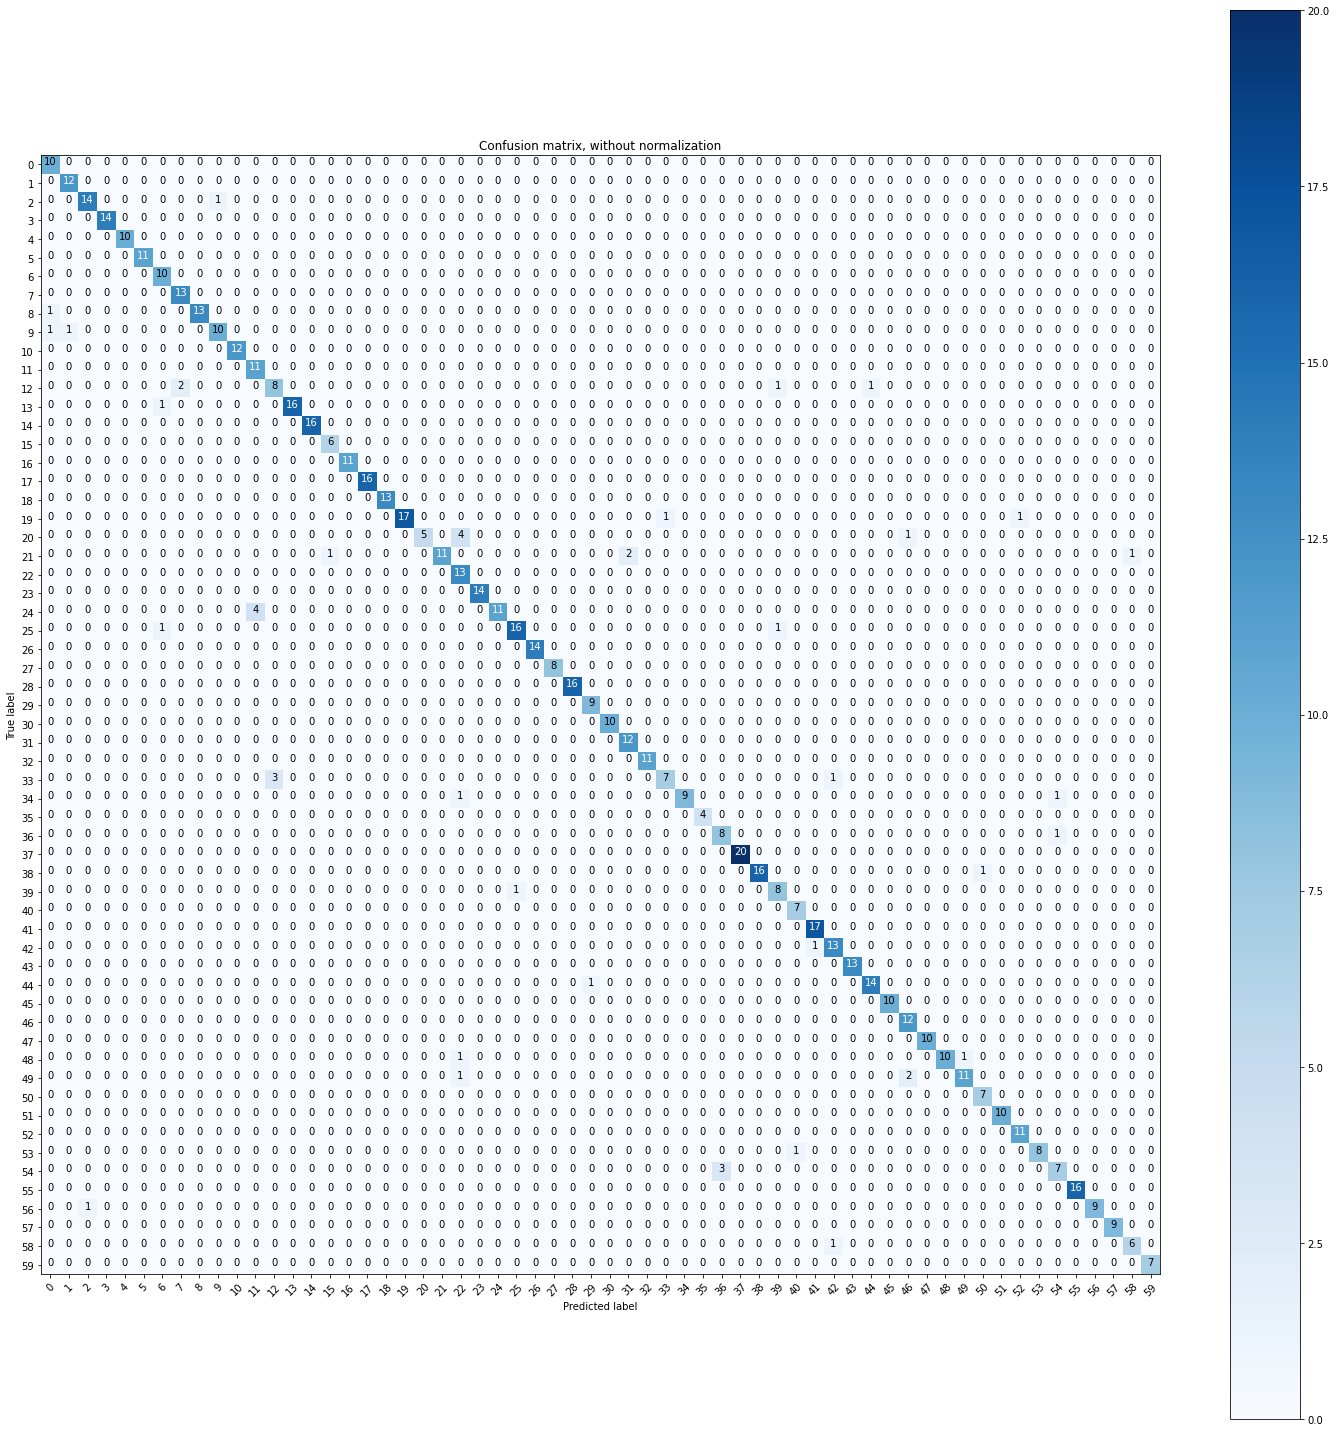

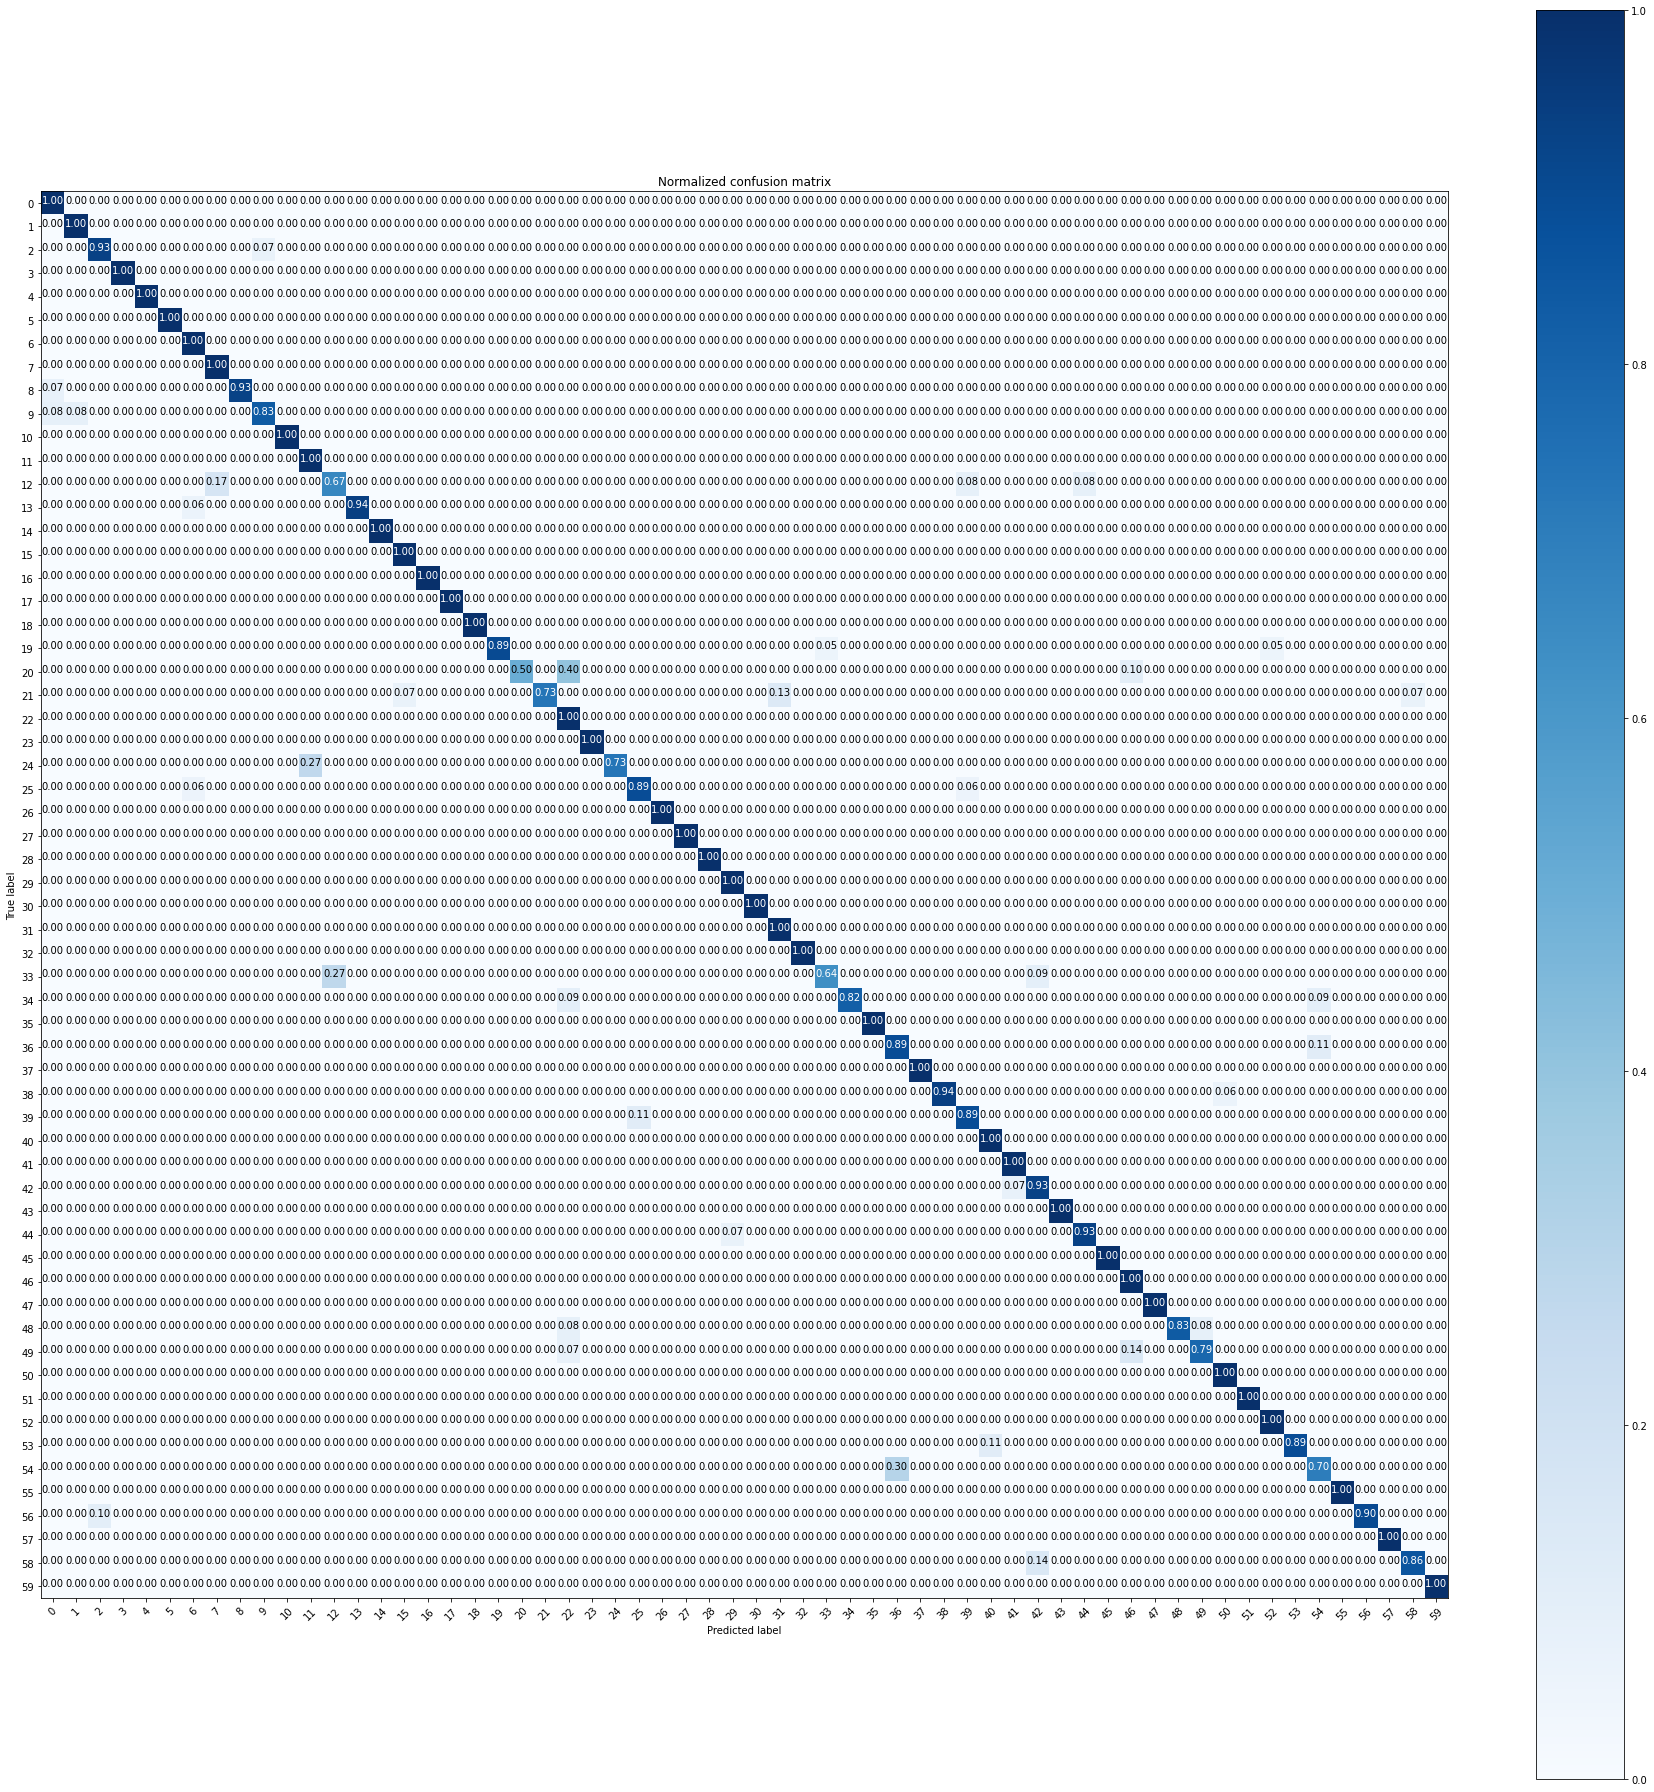

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
plt.figure(figsize = (20, 20))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (25, 25))
# plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# 11. Test

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

In [ ]:
import time

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
len(sequence)

TypeError: object of type 'int' has no len()

In [ ]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

23/23 [==============================] - 0s 9ms/step - loss: 0.1850 - categorical_accuracy: 0.9319


[0.18495017290115356, 0.9319444298744202]

In [ ]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [ ]:
import cv2
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_hands.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read() # đọc video từ camera

        # Make detections
        image, results = mediapipe_detection(frame, holistic) # gọi biến image và result = giá trị RGB của ảnh
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results) # nhận diện cơ thể

        # 2. Prediction logic
        keypoints = extract_keypoints(results) # xuất ra array các keypoints cơ thể (mấy cái đốt í)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-60:] # Đưa các frame thu đc vào mảng sequence, ở đây t để là 30 frame cuối

        if len(sequence) == 60:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)]) # Nếu thu đủ số frame của câu, đưa các array đấy vào model rồi ước lượng ra kết quả chính xác nhất trong dữ liệu


        #3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 2:
                sentence = sentence[-2:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        if len(sequence) == 60:
            cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

True

In [ ]:
# (num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 12ms/step


array([[1.3219912e-12, 7.2359457e-04, 4.9331961e-10, 3.2722604e-04,
        4.7698885e-09, 2.0107310e-12, 6.1791079e-11, 1.0857890e-15,
        3.6741954e-10, 1.0690874e-05, 6.7819390e-03, 1.9937800e-04,
        2.1197306e-14, 2.4954243e-14, 1.1387698e-08, 3.0587435e-05,
        4.5293317e-17, 1.7219467e-05, 1.5870154e-13, 5.8554510e-06,
        2.2034306e-05, 5.1656216e-01, 2.8271705e-07, 3.7462148e-04,
        7.9828169e-04, 4.6690440e-10, 4.9435384e-10, 2.6501386e-08,
        1.0663495e-14, 9.3029725e-12, 4.7080135e-11, 4.4305316e-01,
        2.8953471e-09, 1.0027443e-10, 3.2247208e-05, 4.2942507e-14,
        3.3593144e-09, 2.2082507e-12, 1.8413764e-14, 8.6872143e-20,
        1.4007078e-08, 1.0053395e-17, 8.5366836e-10, 2.6385747e-05,
        8.3052364e-13, 2.3800353e-09, 2.4501393e-02, 1.0462004e-08,
        2.9481728e-07, 2.7424702e-04, 1.2084590e-10, 3.4948232e-11,
        1.9396746e-08, 1.9420150e-07, 1.8674733e-09, 9.2147253e-05,
        5.4552420e-06, 6.7607558e-04, 3.9623533e

In [ ]:
# %% [markdown]
# CONVERT KERAS MODEL TO TFLITE (WITH TENSORLIST FIX)
# %%
import tensorflow as tf
import os

# Load your model
try:
    keras_model = tf.keras.models.load_model("97,5.h5")
    print("✅ Model loaded successfully")
except:
    # Try alternative model paths
    try:
        keras_model = tf.keras.models.load_model("model.h5")
    except:
        print("❌ Could not load model. Make sure to train and save first!")
        print("Run model training cell first, or use existing model.")
        raise

# Show model summary
print("\nModel Summary:")
keras_model.summary()

# Convert to TFLite with TensorList fix
print("\nConverting to TFLite...")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)

# Required settings for TensorList ops
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False

# Optional optimization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# For better performance on mobile, you can also set:
converter.target_spec.supported_types = [tf.float32]

# Convert
try:
    tflite_model = converter.convert()
    print("✅ Conversion successful!")

    # Save model
    output_path = 'sign_language_model.tflite'
    with open(output_path, 'wb') as f:
        f.write(tflite_model)

    # Show info
    file_size = os.path.getsize(output_path) / 1024
    print(f"📁 Saved as: {output_path}")
    print(f"📊 File size: {file_size:.2f} KB")

except Exception as e:
    print(f"❌ Conversion failed: {e}")
    print("\nTrying alternative conversion method...")

    # Alternative: Try saving as SavedModel first
    import tempfile
    import shutil

    # Save as SavedModel
    saved_model_dir = tempfile.mkdtemp()
    tf.saved_model.save(keras_model, saved_model_dir)

    # Convert from SavedModel
    converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
    converter.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS,
        tf.lite.OpsSet.SELECT_TF_OPS
    ]

    try:
        tflite_model = converter.convert()
        with open('sign_language_model_v2.tflite', 'wb') as f:
            f.write(tflite_model)
        print("✅ Conversion successful via SavedModel!")
    finally:
        # Clean up
        shutil.rmtree(saved_model_dir)

✅ Model loaded successfully

Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 60)                1980      
                                                                 
Total para

INFO:tensorflow:Assets written to: /tmp/tmpdoi17u5e/assets


✅ Conversion successful!
📁 Saved as: sign_language_model.tflite
📊 File size: 828.23 KB


In [ ]:
import tensorflow as tf
keras_model = tf.keras.models.load_model("Models/20sentences933.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # sử dụng optimization nếu cần tối ưu thêm
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: No file or directory found at Models/20sentences933.h5

In [ ]:
# %% [markdown]
# CHECK AVAILABLE MODEL FILES
# %%
import os

# List all files in Models directory
models_dir = "Models"
if os.path.exists(models_dir):
    print("Files in Models folder:")
    for file in os.listdir(models_dir):
        print(f"  - {file}")
else:
    print(f"Directory '{models_dir}' doesn't exist!")

# Also check current directory
#print("\nCurrent working directory:", os.getcwd())


Files in Models folder:
  - model 50 câu 95,33
  - model (1)
  - model 50 câu sc 89.17
  - model (3)
  - model (2)
  - model (4)
  - model cũ
  - model 50 câu gốc
  - model (5)


In [ ]:
# First, see what .tflite files you have
import os
import glob

# Check current directory
print("Files in current directory:")
for file in os.listdir():
    if file.endswith('.tflite'):
        print(f"  - {file}")

# Check Models folder
if os.path.exists("Models"):
    print("\nFiles in Models folder:")
    for file in os.listdir("Models"):
        if file.endswith('.tflite'):
            print(f"  - Models/{file}")

# Search recursively
print("\nSearching for all .tflite files:")
tflite_files = glob.glob("**/*.tflite", recursive=True)
for file in tflite_files:
    print(f"  - {file}")

Files in current directory:
  - sign_language_transformer.tflite
  - sign_language_model.tflite

Files in Models folder:

Searching for all .tflite files:
  - sign_language_transformer.tflite
  - sign_language_model.tflite
  - Models/model cũ/model.tflite
  - Models/model cũ/ActionModel.tflite
  - Models/model cũ/SignModel.tflite
  - Models/model cũ/sign.tflite


In [ ]:
#SHOW TFLITE MODEL RESULT

import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="sign_language_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("input details", input_details)
print("ouput details", output_details)

input details [{'name': 'serving_default_lstm_input:0', 'index': 0, 'shape': array([  1,  60, 126], dtype=int32), 'shape_signature': array([ -1,  60, 126], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
ouput details [{'name': 'StatefulPartitionedCall:0', 'index': 70, 'shape': array([ 1, 60], dtype=int32), 'shape_signature': array([-1, 60], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
# TEST MODEL TFLITE

interpreter = tf.lite.Interpreter(model_path="sign_language_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = np.random.rand(1, 60, 126).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0]
print(boxes)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb



# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Sign Language Translation"
model_meta.description = ("Identify the sign language and translate into"
                          "text")
model_meta.version = "v1"
model_meta.author = "khooinguyeen"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")

In [ ]:
# %% [markdown]
# LIGHTWEIGHT 1D CNN - READY TO RUN
# %%
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
np.random.seed(42)
print("Creating lightweight 1D CNN model...")

# 1. CREATE MODEL (Same input shape as your LSTM)
def create_1d_cnn_model():
    model = models.Sequential([
        # First conv block
        layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=(60, 126)),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),

        # Second conv block
        layers.Conv1D(128, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),

        # Third conv block
        layers.Conv1D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),  # Better than Flatten!

        # Classifier
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(60, activation='softmax')  # 60 actions - same as your LSTM
    ])
    return model

# 2. BUILD MODEL
cnn_model = create_1d_cnn_model()
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model created! Summary:")
cnn_model.summary()

# 3. TRAIN MODEL (Using YOUR EXISTING DATA)
print("\nTraining model with your data...")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Use your existing test split
    epochs=30,  # Fewer epochs needed (trains faster!)
    batch_size=32,
    verbose=1
)

# 4. EVALUATE
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ 1D CNN Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"✅ 1D CNN Test Loss: {test_loss:.4f}")

# 5. COMPARE WITH YOUR LSTM (If you have LSTM results)
# print(f"Your LSTM accuracy was: {lstm_accuracy:.4f}")

Creating lightweight 1D CNN model...
Model created! Summary:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 60, 64)            24256     
                                                                 
 batch_normalization_12 (Ba  (None, 60, 64)            256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 30, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 30, 128)           24704     
                                                                 
 batch_normalization_13 (Ba  (None, 30, 128)           512       
 tchNormalization)                                        

In [ ]:
# CNN METRICS
print("\n📊 CNN MODEL METRICS")
print("="*50)

# Get predictions
cnn_predictions = cnn_model.predict(X_test, verbose=0)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

# Calculate metrics
cnn_precision, cnn_recall, cnn_f1, _ = precision_recall_fscore_support(
    true_labels, cnn_pred_labels, average='weighted', zero_division=0
)

# Print results
print(f"Accuracy:    {(cnn_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {cnn_precision*100:.2f}%")
print(f"Recall:      {cnn_recall*100:.2f}%")
print(f"F1-Score:    {cnn_f1*100:.2f}%")


📊 CNN MODEL METRICS
Accuracy:    83.75%
Precision:   90.53%
Recall:      83.75%
F1-Score:    84.07%


✅ TensorFlow version: 2.13.1
Building Transformer model...

📊 Transformer Model Summary:
Model: "SignLanguageTransformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 126)]         0         
                                                                 
 dense_17 (Dense)            (None, 60, 128)           16256     
                                                                 
 positional_encoding_1 (Pos  (None, 60, 128)           0         
 itionalEncoding)                                                
                                                                 
 transformer_block_2 (Trans  (None, 60, 128)           593920    
 formerBlock)                                                    
                                                                 
 transformer_block_3 (Trans  (None, 60, 128)           593920    
 formerBlock)       

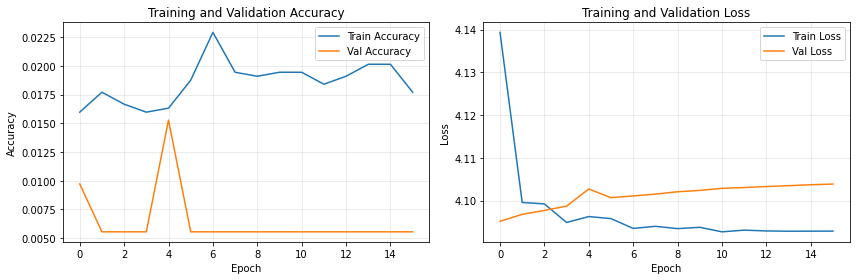


🎯 Sample Predictions:

Sample 1:
  True class: 14
  Predicted: 58 (1.7% confidence)
  Top-3: 58(1.7%), 7(1.7%), 57(1.7%)

Sample 2:
  True class: 55
  Predicted: 58 (1.7% confidence)
  Top-3: 58(1.7%), 7(1.7%), 57(1.7%)

Sample 3:
  True class: 22
  Predicted: 58 (1.7% confidence)
  Top-3: 58(1.7%), 7(1.7%), 57(1.7%)

Sample 4:
  True class: 6
  Predicted: 58 (1.7% confidence)
  Top-3: 58(1.7%), 7(1.7%), 57(1.7%)

Sample 5:
  True class: 26
  Predicted: 58 (1.7% confidence)
  Top-3: 58(1.7%), 7(1.7%), 57(1.7%)


/home/yadanar/anaconda3/envs/vsl/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /tmp/tmpu_l8u1gq/assets


INFO:tensorflow:Assets written to: /tmp/tmpu_l8u1gq/assets


💾 TFLite model saved as 'sign_language_transformer.tflite'
   Size: 4821.0 KB

TRANSFORMER TRAINING COMPLETE!


In [ ]:
# %% [markdown]
# TRANSFORMER ENCODER FOR SIGN LANGUAGE RECOGNITION
# %%
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

print("✅ TensorFlow version:", tf.__version__)

# %% [markdown]
# 1. TRANSFORMER BUILDING BLOCKS
# %%
class TransformerBlock(layers.Layer):
    """Single transformer encoder block with multi-head attention"""
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class PositionalEncoding(layers.Layer):
    """Add positional encoding to sequences"""
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model
        )

        # Apply sin to even indices, cos to odd indices
       /home/yadanar/anaconda3/envs/vsl/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model( sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        seq_len = tf.shape(inputs)[1]
        return inputs + self.pos_encoding[:, :seq_len, :]

# %% [markdown]
# 2. BUILD TRANSFORMER MODEL
# %%
def create_transformer_model(input_shape=(60, 126), num_classes=60):
    """
    Creates Transformer Encoder for sign language recognition
    Input: (sequence_length=60, features=126)
    Output: 60-class probabilities
    """
    # Input layer
    inputs = layers.Input(shape=input_shape)

    # Project to embedding dimension
    x = layers.Dense(128, activation='linear')(inputs)  # Project to 128-dim space
    x = PositionalEncoding(input_shape[0], 128)(x)      # Add positional encoding

    # Transformer blocks
    x = TransformerBlock(embed_dim=128, num_heads=8, ff_dim=256, rate=0.1)(x)
    x = TransformerBlock(embed_dim=128, num_heads=8, ff_dim=256, rate=0.1)(x)

    # Global pooling and classification
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='SignLanguageTransformer')
    return model

# %% [markdown]
# 3. CREATE & COMPILE MODEL
# %%
print("Building Transformer model...")
transformer_model = create_transformer_model()

# Compile with Adam optimizer
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy')]
)

print("\n📊 Transformer Model Summary:")
transformer_model.summary()

# %% [markdown]
# 4. TRAIN TRANSFORMER (USING YOUR EXISTING DATA)
# %%
print("\n" + "="*60)
print("TRAINING TRANSFORMER MODEL")
print("="*60)

# Check your data exists
try:
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
except NameError:
    print("❌ Data not found! Run your data preparation cells first.")
    print("Make sure X_train, y_train, X_test, y_test are defined.")
    # Uncomment below if you need to recreate data
    # raise

# Training callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
print("\n🏋️ Training... (This may take 10-20 minutes)")
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=80,                    # Transformers need more epochs
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# %% [markdown]
# 5. EVALUATE RESULTS
# %%
print("\n" + "="*60)
print("EVALUATION RESULTS")
print("="*60)

# Evaluate on test set
test_results = transformer_model.evaluate(X_test, y_test, verbose=0)
print(f"\n📈 Final Test Results:")
print(f"   Test Loss: {test_results[0]:.4f}")
print(f"   Test Accuracy: {test_results[1]:.4f} ({test_results[1]*100:.2f}%)")
print(f"   Top-3 Accuracy: {test_results[2]:.4f} ({test_results[2]*100:.2f}%)")

# Compare with your LSTM if available
try:
    lstm_test_acc = accuracy_score(ytrue, yhat)  # Your LSTM accuracy
    print(f"\n🔄 Comparison with your LSTM ({lstm_test_acc*100:.2f}%):")
    print(f"   Transformer Accuracy: {test_results[1]*100:.2f}%")
    diff = test_results[1] - lstm_test_acc
    if diff > 0:
        print(f"   ✅ Transformer is {diff*100:.2f}% BETTER")
    else:
        print(f"   ⚠️  Transformer is {-diff*100:.2f}% WORSE")
except:
    pass

# %% [markdown]
# 6. VISUALIZE TRAINING
# %%
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# 7. MAKE PREDICTIONS & SHOW EXAMPLES
# %%
print("\n🎯 Sample Predictions:")

# Get predictions for first 5 test samples
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for i, idx in enumerate(sample_indices):
    sample = X_test[idx:idx+1]  # Keep batch dimension
    true_label = np.argmax(y_test[idx])

    # Predict
    prediction = transformer_model.predict(sample, verbose=0)
    pred_label = np.argmax(prediction[0])
    confidence = np.max(prediction[0])

    # Get top 3 predictions
    top_3 = np.argsort(prediction[0])[-3:][::-1]
    top_3_conf = prediction[0][top_3]

    print(f"\nSample {i+1}:")
    print(f"  True class: {true_label}")
    print(f"  Predicted: {pred_label} ({confidence*100:.1f}% confidence)")
    print(f"  Top-3: {top_3[0]}({top_3_conf[0]*100:.1f}%), {top_3[1]}({top_3_conf[1]*100:.1f}%), {top_3[2]}({top_3_conf[2]*100:.1f}%)")

# %% [markdown]
# 8. SAVE THE MODEL (OPTIONAL)
# %%
# Save as H5
transformer_model.save('sign_language_transformer.h5')
#print("\n💾 Model saved as 'sign_language_transformer.h5'")

# Save as TFLite (with TensorList fix)
converter = tf.lite.TFLiteConverter.from_keras_model(transformer_model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

with open('sign_language_transformer.tflite', 'wb') as f:
    f.write(tflite_model)
print("💾 TFLite model saved as 'sign_language_transformer.tflite'")
print(f"   Size: {len(tflite_model)/1024:.1f} KB")

print("\n" + "="*60)
print("TRANSFORMER TRAINING COMPLETE!")
print("="*60)

In [ ]:
# TRANSFORMER METRICS
print("\n📊 TRANSFORMER MODEL METRICS")
print("="*50)

# Get predictions
transformer_predictions = transformer_model.predict(X_test, verbose=0)
transformer_pred_labels = np.argmax(transformer_predictions, axis=1)

# Calculate metrics
transformer_precision, transformer_recall, transformer_f1, _ = precision_recall_fscore_support(
    true_labels, transformer_pred_labels, average='weighted', zero_division=0
)

# Print results
print(f"Accuracy:    {(transformer_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {transformer_precision*100:.2f}%")
print(f"Recall:      {transformer_recall*100:.2f}%")
print(f"F1-Score:    {transformer_f1*100:.2f}%")


📊 TRANSFORMER MODEL METRICS
Accuracy:    0.97%
Precision:   0.01%
Recall:      0.97%
F1-Score:    0.02%


In [ ]:
print("\n📊 LSTM MODEL METRICS")
print("="*50)
# Print results
print(f"Accuracy:    {(lstm_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {lstm_precision*100:.2f}%")
print(f"Recall:      {lstm_recall*100:.2f}%")
print(f"F1-Score:    {lstm_f1*100:.2f}%")

print("\n📊 CNN MODEL METRICS")
print("="*50)
# Print results
print(f"Accuracy:    {(cnn_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {cnn_precision*100:.2f}%")
print(f"Recall:      {cnn_recall*100:.2f}%")
print(f"F1-Score:    {cnn_f1*100:.2f}%")

print("\n📊 TRANSFORMER MODEL METRICS")
print("="*50)
# Print results
print(f"Accuracy:    {(transformer_pred_labels == true_labels).mean()*100:.2f}%")
print(f"Precision:   {transformer_precision*100:.2f}%")
print(f"Recall:      {transformer_recall*100:.2f}%")
print(f"F1-Score:    {transformer_f1*100:.2f}%")


📊 LSTM MODEL METRICS
Accuracy:    93.33%
Precision:   94.13%
Recall:      93.33%
F1-Score:    93.24%

📊 CNN MODEL METRICS
Accuracy:    83.75%
Precision:   90.53%
Recall:      83.75%
F1-Score:    84.07%

📊 TRANSFORMER MODEL METRICS
Accuracy:    0.97%
Precision:   0.01%
Recall:      0.97%
F1-Score:    0.02%


In [ ]:
del model #xóa model